## EDA по данным риелторской компании

В файле clients.csv предоставлена информация о клиентах риелторской компании США за один месяц. Вам необходимо как специалисту по Data Science сделать следующее:

- Провести разведочный анализ данных, посмотреть на датасет, есть ли пропуски - посмотреть на зависимости признаков
- Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).

Таким образом после вашего анализа, я хочу увидеть описание нашего целевого клиента с соответствующими визуализациями. Ожидаю увидеть как минимум 5 графиков с комментариями. Отнеситесь к заданию достойно, представьте, что от Вашего отчета зависит принятие важного решения.

---

**Баллы могут быть снижены** за качество кода - старайтесь чтобы код был максимально лаконичным. Названия переменных (если они используются) должны отражать максимальную ее сущность.

**Комментарии по сдаче практического задания**:
1. Залить в репу на github в папку module_2/descriptive_stats
2. Ссылку на репо отправлять мне на почту alexadevv@gmail.com не позднее дедлайна.
3. Тема письма: Домашнее задание по модулю 2 <Фамилия Имя>
4. После дедлайна, неотправленные на почту задания, оцениваются максимум в 7 баллов.

In [158]:
!pip install missingno

In [159]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [160]:
df = pd.read_csv('clients.csv')
df.head(5)



,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

In [162]:
df.isnull().sum()

ID                          0
Building                    0
Year of sale                0
Month of sale               0
Type of property            0
Property number             0
Area (ft.)                  0
Price                       0
Status                      0
Customer ID                 0
Entity                      0
Name                        0
Surname                     0
Age at time of purchase    17
Age Interval               17
Y                          17
M                          17
D                          17
Gender                     17
Country                     0
State                      14
Purpose                     0
Deal satisfaction           0
Mortgage                    0
Source                      0
dtype: int64

## Пропущенные значения присутствуют в  7-ми колонках . Посмотрим на им взяимосвязь, и значения , возможно некоторые из колонок нам вовсе не нужны    

In [251]:
df['Price'] = df['Price'].replace('[\\$,]', '', regex=True).replace(',', '', regex=True).astype(float)

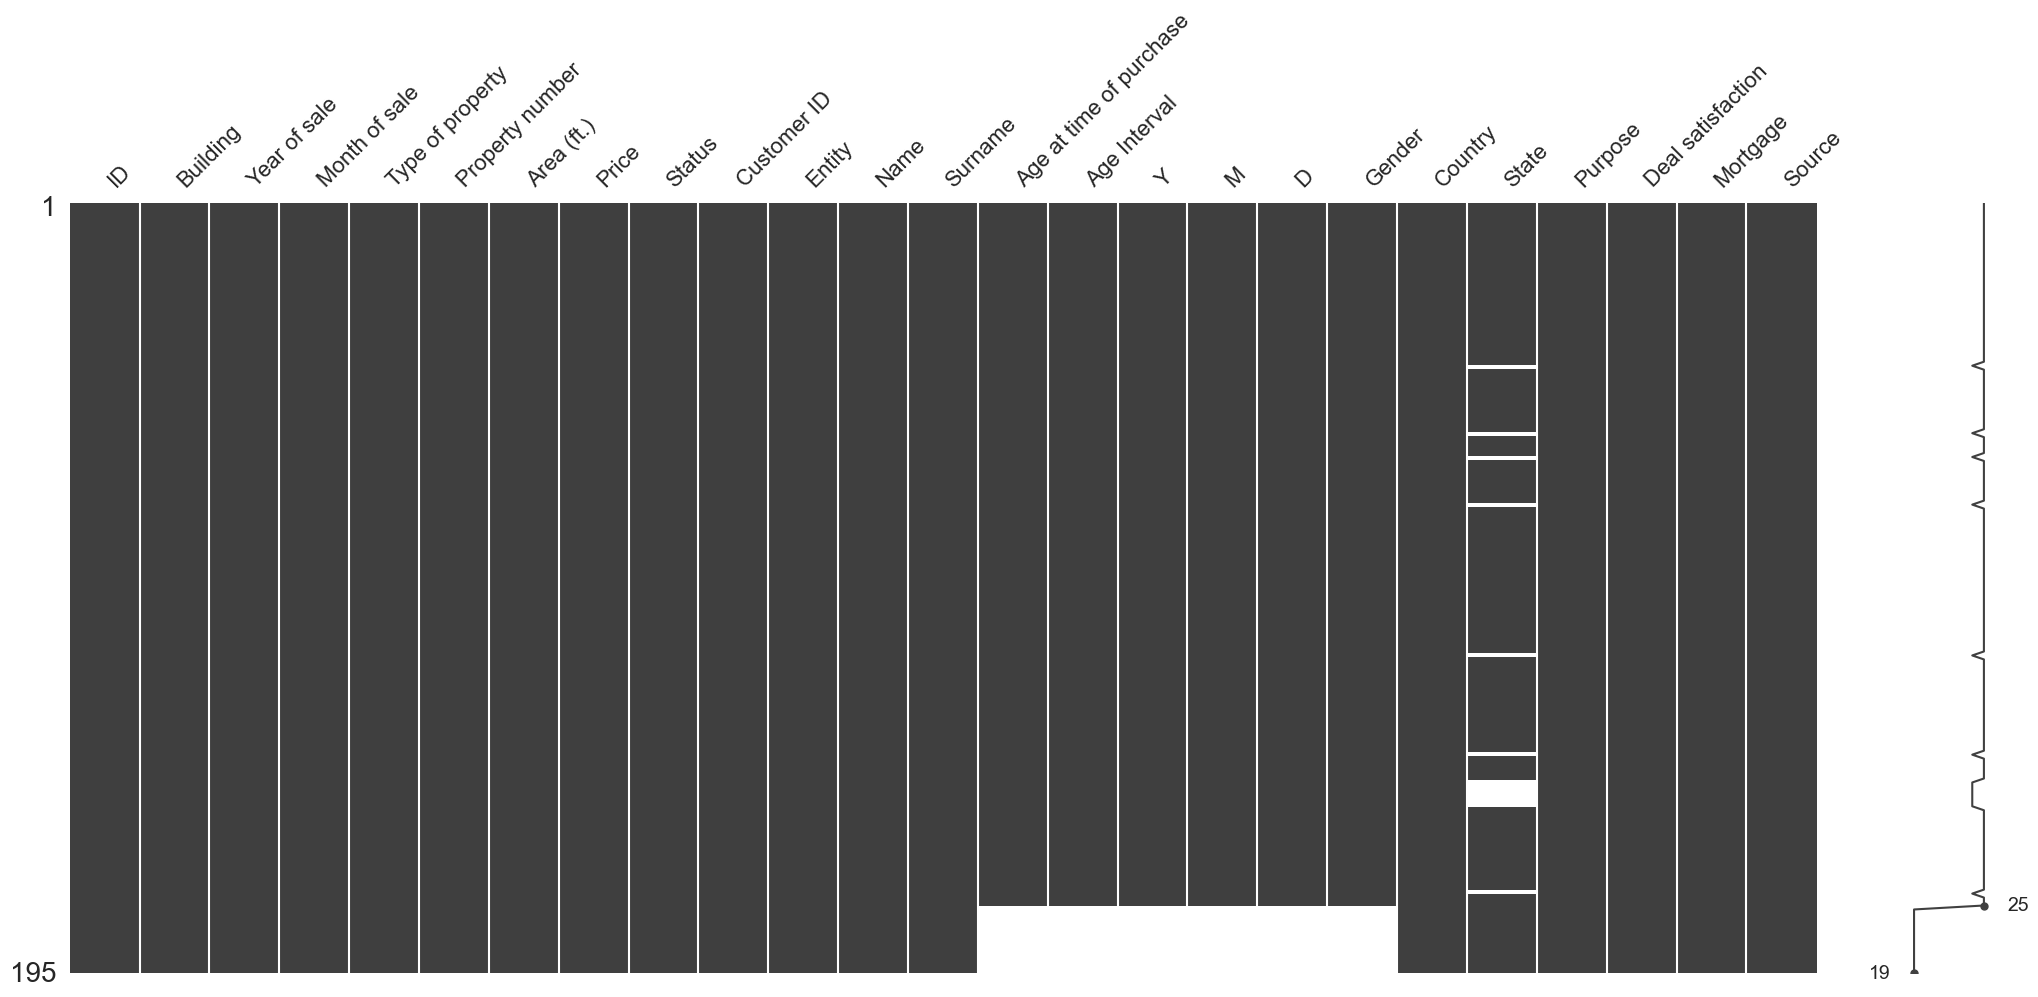

<Figure size 1500x900 with 0 Axes>

In [163]:
import missingno as msno

msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

In [164]:
Как видно, проблема с заполнением  в столбце State - разреженные данные. Посмотрим поближе на значения. 
    Также нижние  строки  имеют пропуски значеий в 6-ти колонках. Посмотрим на них поближе

SyntaxError: invalid syntax (883749734.py, line 1)

In [252]:
df.tail(19)


,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Customer ID,Entity,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
176,3052,3,2006,3,Apartment,52,923.21,291494.36,C0172,Individual,...,1933.0,6.0,8.0,M,USA,California,Home,4,Yes,Agency
177,3025,3,2007,6,Apartment,25,923.21,296483.14,C0104,Individual,...,1931.0,2.0,13.0,F,USA,Arizona,Home,3,No,Website
178,1005,1,2004,3,Office,5,410.71,117564.07,C0001,Firm,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Agency
179,1009,1,2004,11,Office,9,1200.82,317196.40,C0012,Firm,...,NaN,NaN,NaN,NaN,USA,Nevada,Investment,5,No,Website
180,1009,1,2004,11,Office,10,800.96,264142.16,C0012,Firm,...,NaN,NaN,NaN,NaN,USA,Nevada,Investment,4,No,Website
181,1011,1,2005,9,Office,11,827.87,222947.21,C0025,Firm,...,NaN,NaN,NaN,NaN,USA,Nevada,Investment,5,Yes,Website
182,1007,1,2005,12,Apartment,7,775.69,250312.53,C0029,Firm,...,NaN,NaN,NaN,NaN,USA,Nevada,Investment,1,Yes,Website
183,1008,1,2005,12,Office,8,775.69,246050.40,C0029,Firm,...,NaN,NaN,NaN,NaN,USA,California,Investment,1,Yes,Website
184,2038,2,2006,10,Apartment,38,1604.75,529317.28,C0055,Firm,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
185,2001,2,2004,3,Apartment,1,587.28,169158.29,C0121,Firm,...,NaN,NaN,NaN,NaN,USA,California,Home,3,Yes,Website


In [166]:
df.State.value_counts()

State
California    119
Nevada         17
Arizona        11
Oregon         11
Colorado       11
Utah            6
Virginia        4
Kansas          1
Wyoming         1
Name: count, dtype: int64

## Поскольку наш датасет небольшой, можем посмотреть все его уникальные значения 

In [167]:
for col in df.columns:
    print(f"\n--- Столбец: {col} ---")
    unique_values = df[col].unique()
    count = len(unique_values)
    print(f"Уникальные значения ({count}): {unique_values}")


--- Столбец: ID ---
Уникальные значения (194): [1030 1029 2002 2031 1049 3011 3026 3023 1031 4023 1036 1046 4035 2036
 2056 1047 5051 2007 3020 3029 3015 2004 2006 5013 1026 2054 3033 1025
 3027 3031 2043 3034 3016 1018 2050 2044 3039 3053 2041 5035 4005 1032
 3046 1041 1012 5033 4006 5040 4013 1003 2009 4024 4012 1035 2017 4051
 3014 2051 2025 3047 2046 5016 4041 4018 2005 2010 2022 2047 2012 3038
 4030 3017 1045 2040 2042 2048 3049 1017 1039 2049 3054 3055 3042 1038
 2020 2014 3001 3043 2016 4049 4022 3059 4034 5027 5028 2026 3022 2024
 3003 2011 2028 3028 3036 4010 4011 3035 3037 2032 2018 2035 5025 2029
 3007 3030 2003 5039 5030 3041 2057 4028 3032 3013 1040 4031 4019 4029
 1021 1006 2034 3021 5021 5022 1044 1043 1027 2023 5046 1002 2030 3050
 5050 2039 2008 3019 2015 2033 2019 2021 2027 2052 3006 3044 4025 1015
 5041 5036 2037 5034 4016 4040 1024 2013 3010 3018 1033 1016 3005 5019
 3002 3004 3012 3048 3008 3040 1023 3009 3052 3025 1005 1009 1011 1007
 1008 2038 2001 1013 1014 101

In [253]:
df.describe()


,ID,Building,Year of sale,Month of sale,Property number,Area (ft.),Price,Age at time of purchase,Y,M,D,Deal satisfaction
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,178.000000,178.000000,178.000000,178.000000,195.000000
mean,2591.425641,2.564103,2006.333333,7.271795,27.328205,899.867128,269434.560923,46.151685,1960.325843,6.702247,15.449438,3.605128
std,1244.617996,1.243434,1.072941,3.378674,14.830832,261.489550,80129.094465,12.841692,12.835575,3.394262,8.457285,1.363355
min,1002.000000,1.000000,2004.000000,1.000000,1.000000,410.710000,117564.070000,19.000000,1931.000000,1.000000,1.000000,1.000000
25%,2003.500000,2.000000,2006.000000,4.000000,15.000000,739.860000,212393.250000,37.000000,1950.250000,4.000000,8.000000,3.000000
50%,2054.000000,2.000000,2007.000000,8.000000,27.000000,785.480000,243052.590000,45.000000,1962.000000,6.000000,15.000000,4.000000
75%,3048.500000,3.000000,2007.000000,10.000000,39.000000,1075.460000,308550.875000,55.000000,1969.750000,9.000000,23.750000,5.000000
max,5051.000000,5.000000,2010.000000,12.000000,59.000000,1942.500000,529317.280000,76.000000,1986.000000,12.000000,31.000000,5.000000


In [169]:
df.Status.value_counts()


Status
Sold     195
Name: count, dtype: int64

In [170]:
df.Country.value_counts()

Country
USA        165
USA         12
Canada       7
Russia       4
UK           2
Belgium      2
Denmark      1
Germany      1
Mexico       1
Name: count, dtype: int64

## Проведя первичный анализ видим что:
  1. - можно удалить колонку Status потому что она имеет только одно значение во всех строках - колонка не информативна
  2.  - в колонке M месяц встречается значение 15, заменим его на самое часто встречающееся значение(mode)
  3.  - колонка ID в целом тоже нам не нужна для анализа - удаляем
  4.  - колонка Property number имеет цифры, зачение которых на этом этапе нам не известно удалим
  5. -  переведем площадь из футов  в более привычные квадратные метры 1 ft² = 0.092903 m² и создадим новую колонку Area_m2
  6. -  нижние колонки с пропущенными значениями( D, M,Y, surnamу, Age at time of purchase,Age Interval, Gender ) имеют общее : тип Entity - Firm, Country  - USA. Можно данные по покупкам фирм собрать в отдельный датасет. 

In [176]:
df = df.drop('Status', axis=1, inplace=True)


KeyError: "['Status'] not found in axis"

In [174]:
df.loc[df['M'] == 15, 'M'] = df['M'].mode()[0]

In [ ]:
df = df.drop('ID', axis=1)

In [ ]:
df['Area_m2'] = df['Area (ft.)'] * 0.092903 
df=df.drop('Area (ft.)', axis=1)



In [ ]:
df.head(5)

In [ ]:
df.Entity.value_counts() 

## Разделим датасет по данным  Entity на 2 датасета: df_individuals - покупки физическиз лиц, dr_firm - покупки юридических лиц

In [ ]:
df_firm = df[df.Entity == 'Firm']
df_individual = df[df.Entity == 'Individual']

In [ ]:
df_firm.info()

In [ ]:
df_firm.Surname.value_counts()

In [ ]:
df_firm.Country.value_counts()

## Удалим пустые колонки и колонки  Surname с единственным значением Co, а также Country - все USA  


In [ ]:
print(df_firm.columns)

In [254]:
df_firm = df_firm.drop(['Surname',
       'Age at time of purchase', 'Age Interval ', 'Y', 'M', 'D', 'Gender',
       'Country'], axis='columns')


KeyError: "['Surname', 'Age at time of purchase', 'Age Interval ', 'Y', 'M', 'D', 'Gender', 'Country'] not found in axis"

In [ ]:
df_firm

In [255]:
df_individual.info()


<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 177
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Building                 178 non-null    int64  
 1   Year of sale             178 non-null    int64  
 2   Month of sale            178 non-null    int64  
 3   Type of property         178 non-null    object 
 4   Property number          178 non-null    int64  
 5   Price                    178 non-null    float64
 6   Customer ID              178 non-null    object 
 7   Name                     178 non-null    object 
 8   Surname                  178 non-null    object 
 9   Age at time of purchase  178 non-null    float64
 10  Age Interval             178 non-null    object 
 11  Gender                   178 non-null    object 
 12  Country                  178 non-null    object 
 13  State                    178 non-null    object 
 14  Purpose                  178 no

## Теперь разберемся с df_individual

## Теперь разберемся с df_individual
   1.  - Удалим колонку Entity
   2.  - Заменим пропущенные значения в State на Unknown
   3.  - ID удалимБ,  Сustom ID в нашем исследовании тоже не нужен, но так как мы изучаем физических лиц - пока оставим до уточнения
   4.  - Колонки M,D,Y дублируют Age at time of purchase, и Age Interval - удаляем	

In [ ]:
df_individual.State = df_individual.State.fillna('Unknown')


In [ ]:
df_individual.drop(['Entity', 'Y', 'D', 'M', 'ID'
       ], axis='columns')

##  Дата сет df_individual готов анализу покупателя - физического лица


In [256]:
df_individual.head()


,Building,Year of sale,Month of sale,Type of property,Property number,Price,Customer ID,Name,Surname,Age at time of purchase,Age Interval,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source,Area_m2
0,1,2005,11,Apartment,30,246172.68,C0028,Madalyn,Mercer,19.0,18-25,F,USA,California,Home,5,No,Website,69.035290
1,1,2005,10,Apartment,29,246331.90,C0027,Lara,Carrillo,22.0,18-25,F,USA,California,Home,5,No,Website,70.254178
2,2,2007,7,Apartment,2,209280.91,C0112,Donavan,Flowers,22.0,18-25,M,USA,California,Home,1,Yes,Client,54.560074
3,2,2007,12,Apartment,31,452667.01,C0160,Darien,Dorsey,22.0,18-25,M,USA,California,Investment,3,Yes,Website,149.086089
4,1,2004,11,Apartment,49,467083.31,C0014,Alessandra,Perry,25.0,18-25,F,USA,California,Home,4,No,Agency,127.783431


In [192]:
df_individual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 177
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Building                 178 non-null    int64  
 1   Year of sale             178 non-null    int64  
 2   Month of sale            178 non-null    int64  
 3   Type of property         178 non-null    object 
 4   Property number          178 non-null    int64  
 5   Price                    178 non-null    object 
 6   Customer ID              178 non-null    object 
 7   Name                     178 non-null    object 
 8   Surname                  178 non-null    object 
 9   Age at time of purchase  178 non-null    float64
 10  Age Interval             178 non-null    object 
 11  Gender                   178 non-null    object 
 12  Country                  178 non-null    object 
 13  State                    178 non-null    object 
 14  Purpose                  178 no

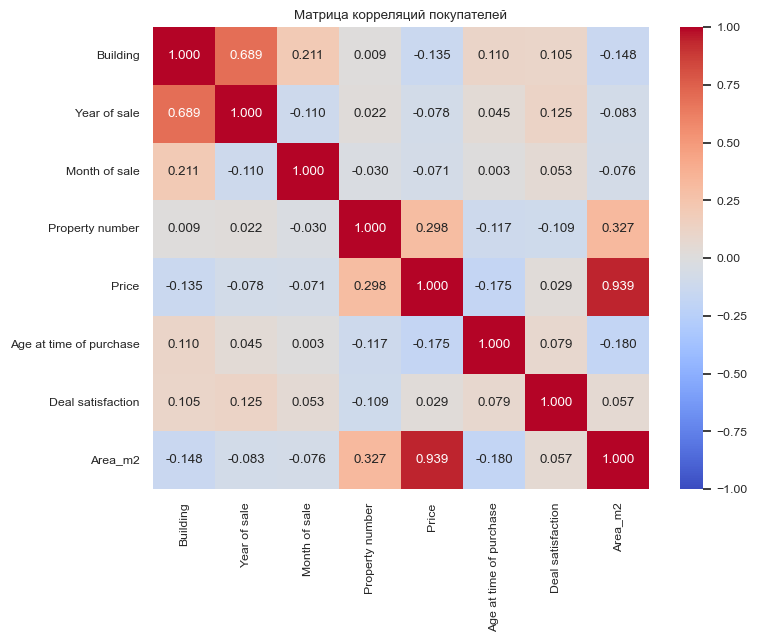

In [257]:
corr_matrix = df_individual.corr(numeric_only=True)

plt.figure(figsize=(8, 6))

sns.heatmap(
    corr_matrix, 
    annot=True,     # Пишем значения внутри ячеек
    cmap='coolwarm', # Цветовая гамма (синий-белый-красный)
    fmt=".3f",      # Формат чисел (2 знака после запятой)
    vmin=-1, vmax=1 # Фиксируем границы цветов (от -1 до 1)
)

plt.title("Матрица корреляций покупателей")
plt.show()

In [ ]:
Есть корреляция цены и площади недвижимостино, что логично. А также связь года продажи и типа постройки

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel", context="talk", font_scale=0.8)

def show_hist(data, column):
    """Show Distribution for column
    Parameters:
    data: data frame
    column: column name
    """
    plt.figure(figsize=(8, 4))
    col_counts = data[col].value_counts()
    sns.barplot(x=list(col_counts.index), y=col_counts.values, palette="viridis",
               hue=col_counts.index, legend=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Cont')
    plt.xticks(rotation=30)
    plt.show()

In [ ]:
def stat_cat(data, col):
    """Show statistic for column
    Parameters:
    data: data frame
    column: column name
    """
    unique = np.sort(data[col].unique())
    print(f'\033[1mStatistic for {col}:\033[0;0m')
    if len(unique)<15:
        for val in unique:
            count = len(data[data[col] == val])
            print(f'Count of \033[1m{val:<10}\033[0;0m is \033[1m{count:<4}\033[0;0m. It is \033[1m({count/ len(data[col]):.2%}\033[0;0m)')
    if(data[col].dtype == float):
        print(f'Mean: {data[col].mean():4.2f}')
    if((data[col].dtype == float) or (data[col].dtype == int)):
        print(f'Min: {data[col].min()}')
        print(f'Max: {data[col].max()}')
        print(f'Median: {data[col].median()}')
    mode = data[col].mode().values
    if len(mode) < 5:
        print(f'Mode: {mode}')

In [ ]:
def show_dist(data, col):
    """Show distribution, mean and median for column
    Parameters:
    data: data frame
    column: column name
    """
    ax = sns.histplot(data[col], kde= True ) 
    ax.axvline(data[col].mean(), c="green", ls="-", lw=1.5, label = " mean ")
    ax.axvline(data[col].median(), c="orange", ls="--", lw=1.5, label = " median ")
    plt.title(f'{col} Distribution') 
    plt.legend(["kernel density estimate", "mean", "median"])
    plt.show()

In [177]:
def show_info(data, col):
        if len(data[col].unique())< 15:
            show_hist(data,col)
            stat_cat(data, col)
        else:
            show_dist(data, col)
            stat_cat(data, col)

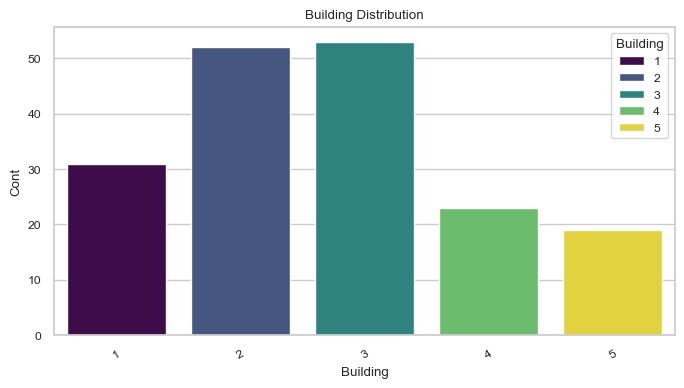

Statistic for Building:
Count of 1          is 31  . It is (17.42%)
Count of 2          is 52  . It is (29.21%)
Count of 3          is 53  . It is (29.78%)
Count of 4          is 23  . It is (12.92%)
Count of 5          is 19  . It is (10.67%)
Min: 1
Max: 5
Median: 3.0
Mode: [3]


In [178]:
i = 1
col = df_individual.columns[i]
show_info(df_individual, col)
i+=1

In [ ]:
#Больше всего покупок квартир в 2-х и 3-х этажных построиках

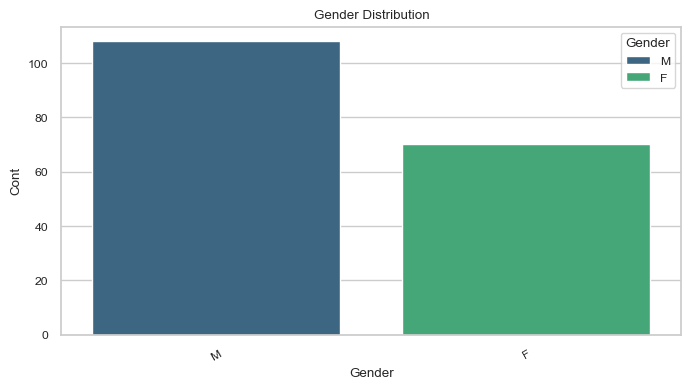

Statistic for Gender:
Count of F          is 70  . It is (39.33%)
Count of M          is 108 . It is (60.67%)
Mode: ['M']


In [193]:
i = 11
col = df_individual.columns[i]
show_info(df_individual, col)
i+=1

In [ ]:
# 60% покупателей - мужчины

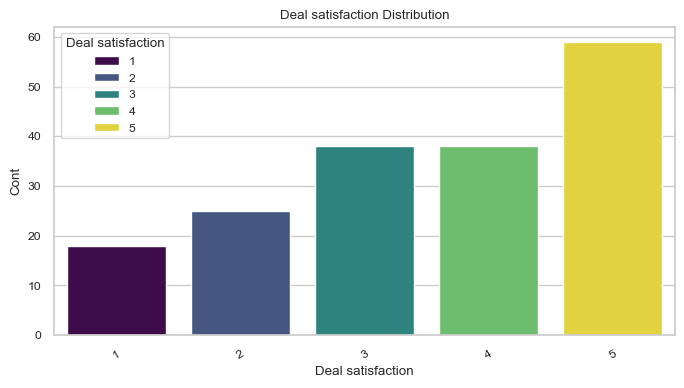

Statistic for Deal satisfaction:
Count of 1          is 18  . It is (10.11%)
Count of 2          is 25  . It is (14.04%)
Count of 3          is 38  . It is (21.35%)
Count of 4          is 38  . It is (21.35%)
Count of 5          is 59  . It is (33.15%)
Min: 1
Max: 5
Median: 4.0
Mode: [5]


In [277]:
i = 15
col = df_individual.columns[i]
show_info(df_individual, col)
i+=1


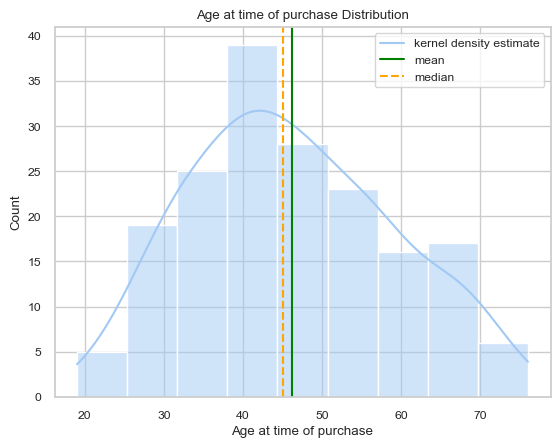

Statistic for Age at time of purchase:
Mean: 46.15
Min: 19.0
Max: 76.0
Median: 45.0
Mode: [48.]


In [196]:
i = 9
col = df_individual.columns[i]
show_info(df_individual, col)
i+=1

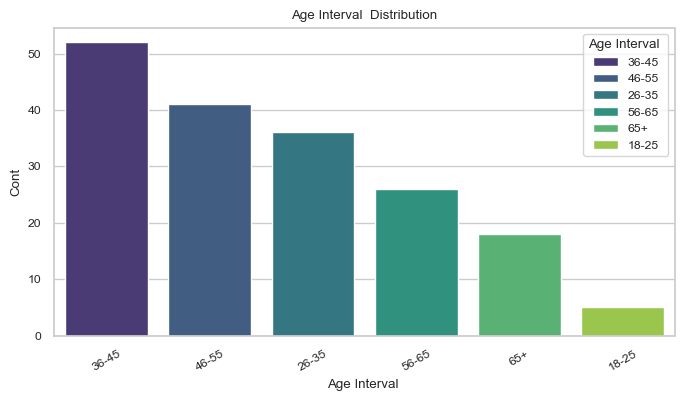

Statistic for Age Interval :
Count of 18-25      is 5   . It is (2.81%)
Count of 26-35      is 36  . It is (20.22%)
Count of 36-45      is 52  . It is (29.21%)
Count of 46-55      is 41  . It is (23.03%)
Count of 56-65      is 26  . It is (14.61%)
Count of 65+        is 18  . It is (10.11%)
Mode: ['36-45']


In [197]:
i = 10
col = df_individual.columns[i]
show_info(df_individual, col)
i+=1

In [ ]:
#  Из двух предыдущих графиков видно, что возраст покупателя находится в интервале 36-45, 
# со средним 46 лет  

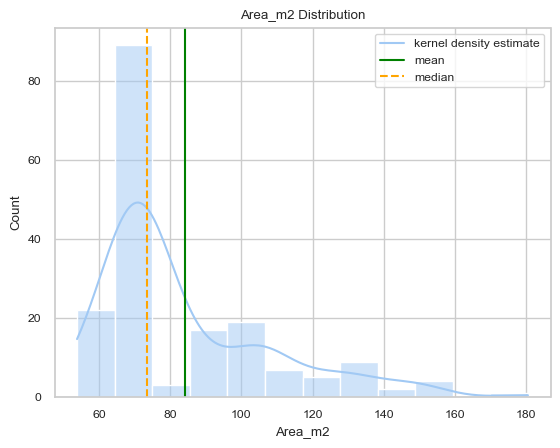

Statistic for Area_m2:
Mean: 84.08
Min: 53.86051425
Max: 180.4640775
Median: 73.62841459
Mode: [72.56374621]


In [198]:
i = 18
col = df_individual.columns[i]
show_info(df_individual, col)
i+=1

In [ ]:
# Средняя площадь покупки недвижимости 84 м2, с самым частым запросом - 72m

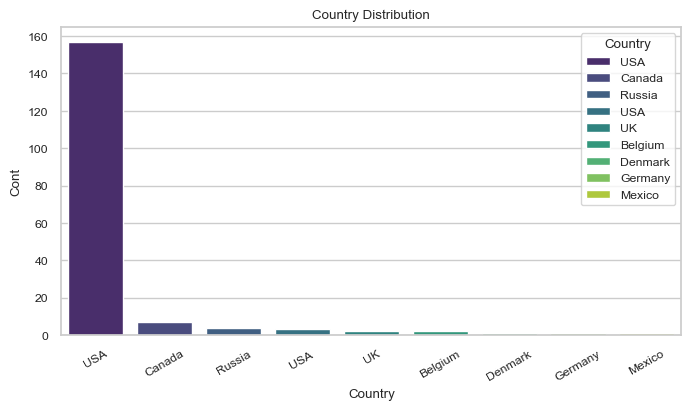

Statistic for Country:
Count of Belgium    is 2   . It is (1.12%)
Count of Canada     is 7   . It is (3.93%)
Count of Denmark    is 1   . It is (0.56%)
Count of Germany    is 1   . It is (0.56%)
Count of Mexico     is 1   . It is (0.56%)
Count of Russia     is 4   . It is (2.25%)
Count of UK         is 2   . It is (1.12%)
Count of USA        is 157 . It is (88.20%)
Count of USA        is 3   . It is (1.69%)
Mode: ['USA']


In [203]:
i = 12
col = df_individual.columns[i]
show_info(df_individual, col)
i+=1

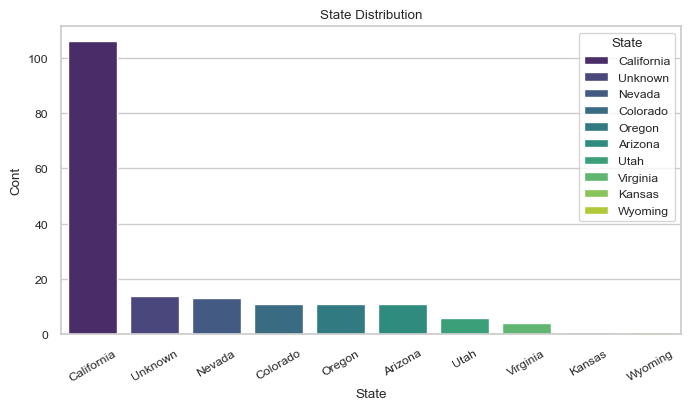

Statistic for State:
Count of Arizona    is 11  . It is (6.18%)
Count of California is 106 . It is (59.55%)
Count of Colorado   is 11  . It is (6.18%)
Count of Kansas     is 1   . It is (0.56%)
Count of Nevada     is 13  . It is (7.30%)
Count of Oregon     is 11  . It is (6.18%)
Count of Unknown    is 14  . It is (7.87%)
Count of Utah       is 6   . It is (3.37%)
Count of Virginia   is 4   . It is (2.25%)
Count of Wyoming    is 1   . It is (0.56%)
Mode: ['California']


In [204]:
i = 13
col = df_individual.columns[i]
show_info(df_individual, col)
i+=1

In [ ]:
#   ЧАще недвижимость покупали в USA (88%) с штате Калифорния (59,5%))

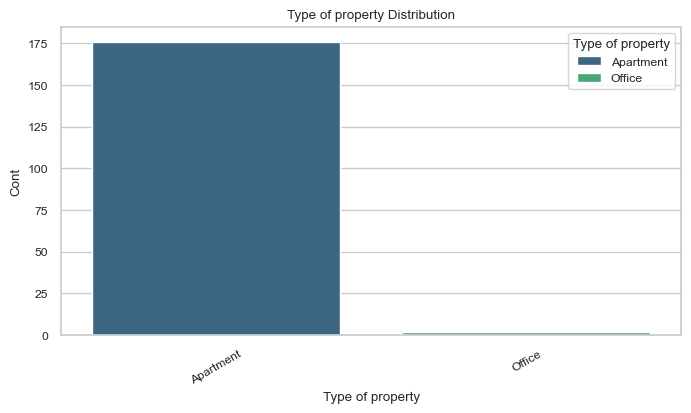

Statistic for Type of property:
Count of Apartment  is 176 . It is (98.88%)
Count of Office     is 2   . It is (1.12%)
Mode: ['Apartment']


In [216]:
i = 3
col = df_individual.columns[i]
show_info(df_individual, col)
i+=1

In [ ]:
# 98% всех продаж - это апартаменты

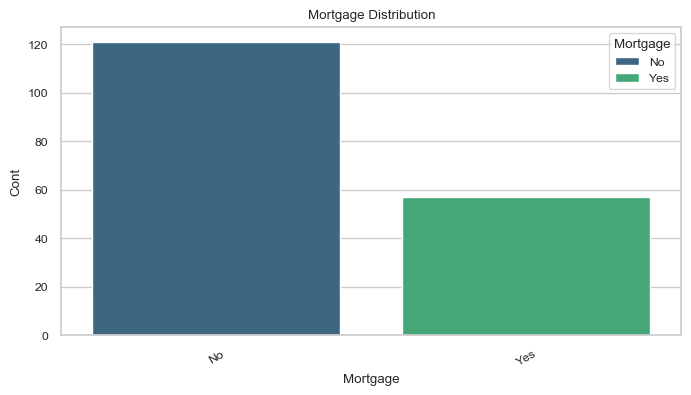

Statistic for Mortgage:
Count of No         is 121 . It is (67.98%)
Count of Yes        is 57  . It is (32.02%)
Mode: ['No']


In [218]:
i = 16
col = df_individual.columns[i]
show_info(df_individual, col)
i+=1

In [ ]:
# Приобретена недвижимость в ипотеку в 32%, ночаще без ипотеки - 67%

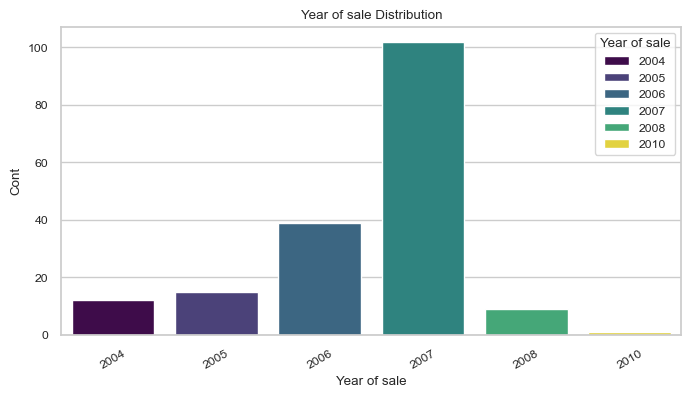

Statistic for Year of sale:
Count of 2004       is 12  . It is (6.74%)
Count of 2005       is 15  . It is (8.43%)
Count of 2006       is 39  . It is (21.91%)
Count of 2007       is 102 . It is (57.30%)
Count of 2008       is 9   . It is (5.06%)
Count of 2010       is 1   . It is (0.56%)
Min: 2004
Max: 2010
Median: 2007.0
Mode: [2007]


In [275]:
i = 1
col = df_individual.columns[i]
show_info(df_individual, col)
i+=1

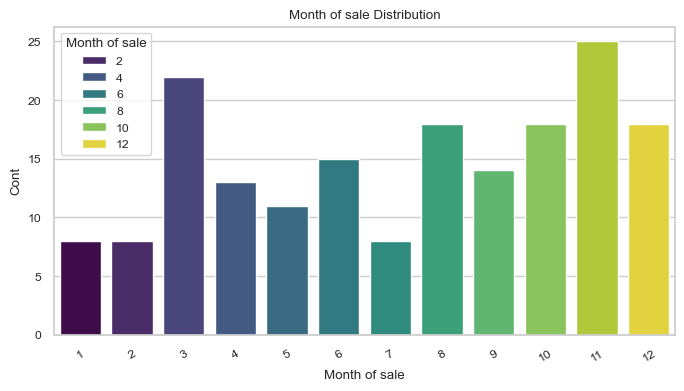

Statistic for Month of sale:
Count of 1          is 8   . It is (4.49%)
Count of 2          is 8   . It is (4.49%)
Count of 3          is 22  . It is (12.36%)
Count of 4          is 13  . It is (7.30%)
Count of 5          is 11  . It is (6.18%)
Count of 6          is 15  . It is (8.43%)
Count of 7          is 8   . It is (4.49%)
Count of 8          is 18  . It is (10.11%)
Count of 9          is 14  . It is (7.87%)
Count of 10         is 18  . It is (10.11%)
Count of 11         is 25  . It is (14.04%)
Count of 12         is 18  . It is (10.11%)
Min: 1
Max: 12
Median: 8.0
Mode: [11]


In [236]:
i = 2
col = df_individual.columns[i]
show_info(df_individual, col)
i+=1

In [ ]:
## Чаще всего продажи происходили в ноябре 14% и в марте 12%, с самыми низкими показателями в январе и феврале

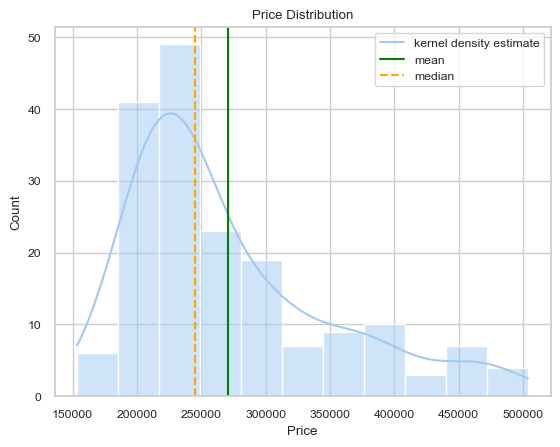

Statistic for Price:
Mean: 270965.43
Min: 153466.71
Max: 503790.23
Median: 245196.73
Mode: [460001.26]


In [260]:
i = 5
col = df_individual.columns[i]
show_info(df_individual, col)
i+=1

In [ ]:
## Самая дешевая недвижимость стоила 153000, самая дорогая - 503000, самая частая цена за недвижимость составила - 250000.

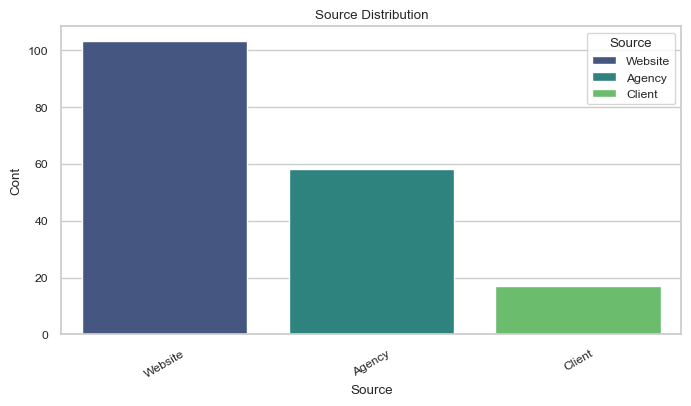

Statistic for Source:
Count of Agency     is 58  . It is (32.58%)
Count of Client     is 17  . It is (9.55%)
Count of Website    is 103 . It is (57.87%)
Mode: ['Website']


In [238]:
i = 17
col = df_individual.columns[i]
show_info(df_individual, col)
i+=1

In [ ]:
#Веб-сайт является основным каналом привлечения клиентов, что подчеркивает важность онлайн-присутствия для компании.

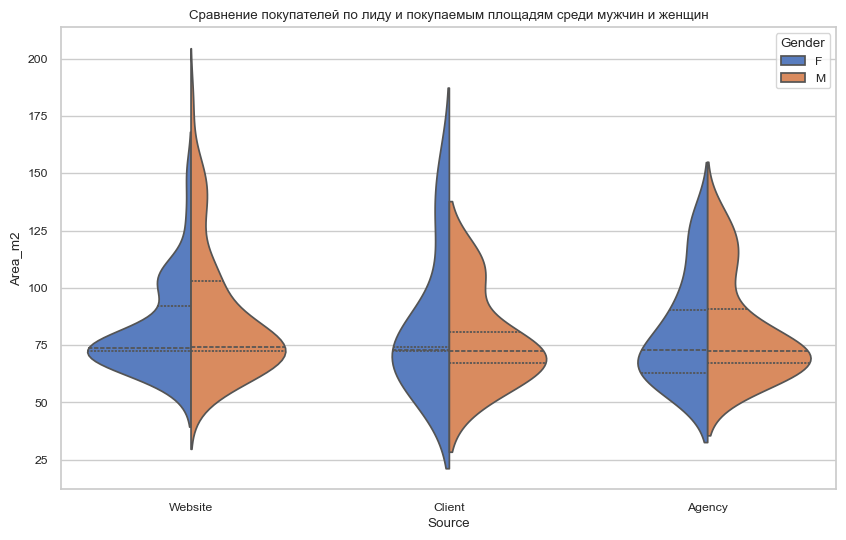

In [237]:
plt.figure(figsize=(10, 6))

sns.violinplot(
    data=df_individual, 
    x="Source", 
    y="Area_m2", 
    hue="Gender", 
    split=True,       
    inner="quart",    
    palette="muted"
)

plt.title("Сравнение покупателей по лиду и покупаемым площадям среди мужчин и женщин")
plt.show()


In [ ]:
## Но женщины чаще мужчин прислушиваются к советам других клиентов- покупателей

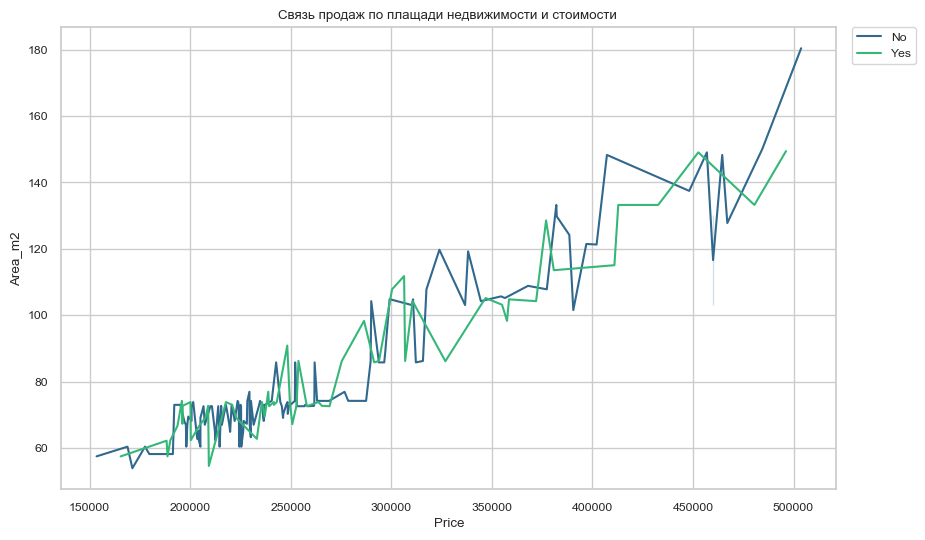

In [259]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_individual, x='Price', y='Area_m2' ,hue='Mortgage', palette="viridis")

plt.title("Покупка недвижимости в ипотеку ")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) 
plt.show()




In [ ]:
## Большую по плошади и более дорогую недвижимость чаще приобретают без привлечения ипотеки, а в дипазоне цен от 270000 до 280000 чаще с ипотекой.

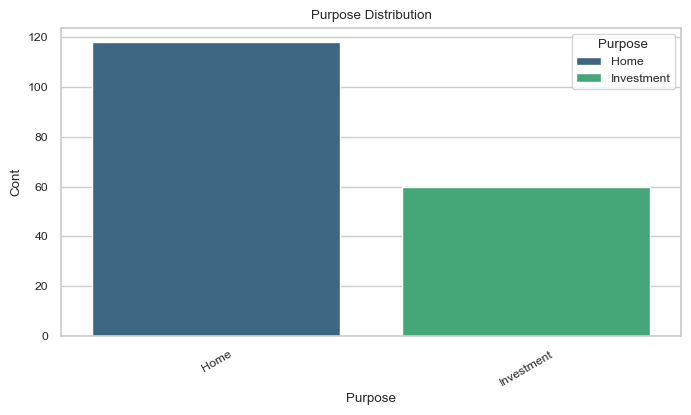

Statistic for Purpose:
Count of Home       is 118 . It is (66.29%)
Count of Investment is 60  . It is (33.71%)
Mode: ['Home']


In [265]:
i = 14
col = df_individual.columns[i]
show_info(df_individual, col)
i+=1

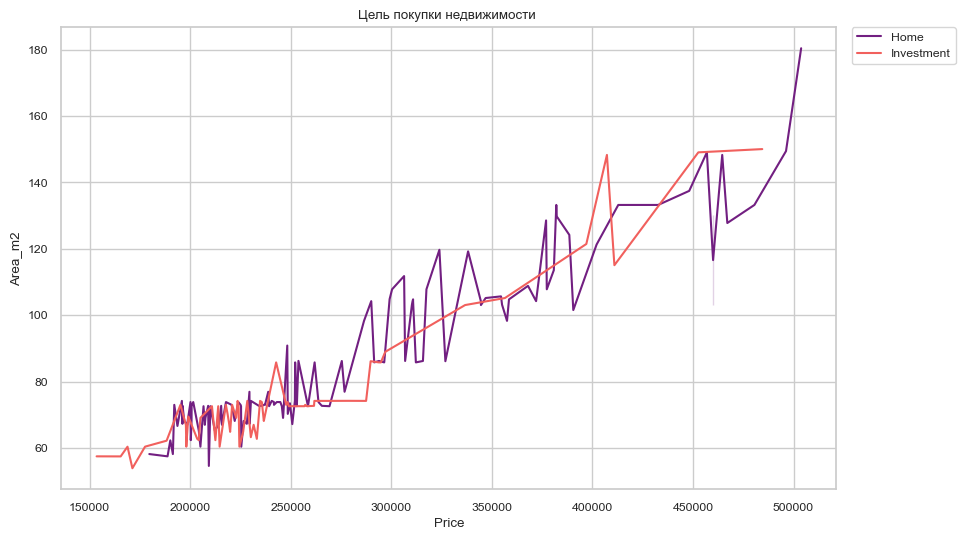

In [264]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_individual, x='Price', y='Area_m2' ,hue='Purpose', palette="magma")

plt.title("Цель покупки недвижимости ")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) 
plt.show()


In [ ]:
#Большая часть недвижимости приобретается с целью жилье - 66.29%), оставшиеся 33% приобретаются как инвестиция.
#более дорогая и большая по площади недвижимость также приобретается с целью жилья.

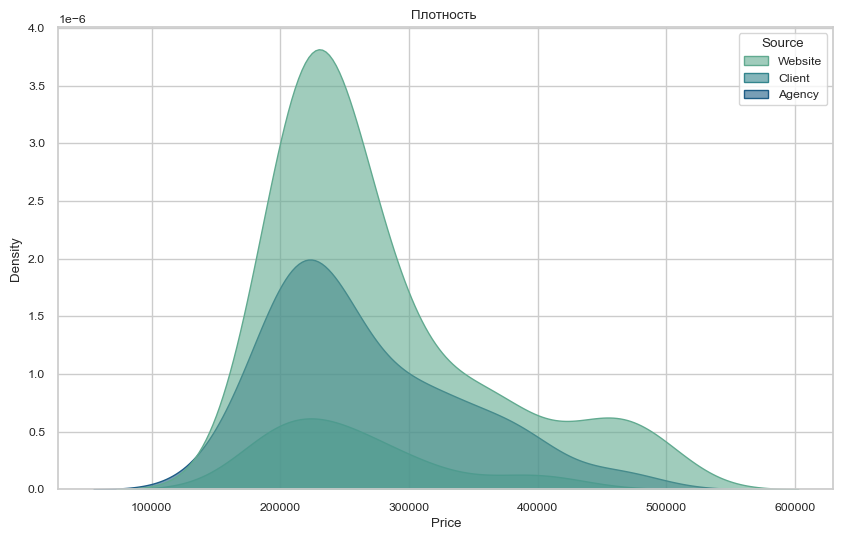

In [271]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_individual, x="Price", hue="Source", fill=True, alpha=0.6, palette="crest")
plt.title("Плотность распределения лидов")
plt.show()

In [ ]:
## Выводы

In [ ]:
   1.Покупки среди физических лиц показывают, что они предпочитали приобретать недвижимость в трехэтажных (29.78%) и двухэтажных (29.21%) зданиях.
   2.Пик сделок пришелся на 2007 год, когда было совершено 57.30% всех покупок, а самыми активными месяцами были ноябрь 14% и март 12%. 
   3.Наибольшую популярность среди типов недвижимости имели апартаменты, составляя 98.88% всех приобретений.
   4.Минимальная цена за недвижимость составила 1 534 670 долларов, максимальная — 5 037 900 000 долларов, а медианная цена — 2 451 967 долларов.
   5.Возраст покупателей варьировался от 19 до 76 лет. Самый активный возрастной интервал составил 36-45 лет (29.21% всех сделок). 
   6.Среди покупателей преобладали мужчины (60.67%), а 89.89% всех покупателей были из США, с наибольшим числом сделок в Калифорнии (59.55%).
   7.Основной целью покупки для 66.29% клиентов было жилье, при этом только 33.15% выразили полное удовлетворение сделкой. 
   8. Большинство покупателей (67.98%) совершали покупку без ипотеки. 
   9.Веб-сайт оказался наиболее эффективным источником лидов, обеспечив 57.87% всех сделок.

   Большинство проданных объектов — среднего размера около 70 метров квадратных. Большинство сделок происходит в среднем ценовом сегменте.



    Типичный портрет целевого клиента компании (физическое лицо): 
       Мужчина, возрастом от 36 до 45 лет, желающий приобрести апартаменты для собственного пользования, площадью 70-75 метров квадратных в США,  
    в штате Калифорния за 2 450 000 долларов без ипотечного кредита, рассматривающий варианты на веб-сайтах.

